# 다항분류 모듈화, 파라미터 튜닝

> 와인 분류 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기


In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action="ignore")

from helper.util import *
from helper.plot import *
from helper.tensor import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### [2] 데이터 가져오기


In [2]:
origin = my_read_excel(
    "https://data.hossam.kr/mldata/wine.xlsx", categories=["class"]
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   alcohol                       178 non-null    float64 
 1   malic_acid                    178 non-null    float64 
 2   ash                           178 non-null    float64 
 3   alcalinity_of_ash             178 non-null    float64 
 4   magnesium                     178 non-null    int64   
 5   total_phenols                 178 non-null    float64 
 6   flavanoids                    178 non-null    float64 
 7   nonflavanoid_phenols          178 non-null    float64 
 8   proanthocyanins               178 non-null    float64 
 9   color_intensity               178 non-null    float64 
 10  hue                           178 non-null    float64 
 11  od280/od315_of_diluted_wines  178 non-null    float64 
 12  proline                       178 non-null    int6

## #02. 데이터 전처리

### [1] 데이터 표준화

In [3]:
df = my_minmax_scaler(origin, "class")
my_pretty_table(df.head())

+----+-----------+--------------+----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+----------+--------------------------------+-----------+---------+
|    |   alcohol |   malic_acid |      ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   nonflavanoid_phenols |   proanthocyanins |   color_intensity |      hue |   od280/od315_of_diluted_wines |   proline |   class |
|----+-----------+--------------+----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+----------+--------------------------------+-----------+---------|
|  0 |  0.842105 |       0.1917 | 0.572193 |            0.257732 |    0.619565 |        0.627586 |      0.57384 |               0.283019 |           0.59306 |          0.372014 | 0.455285 |                       0.970696 |  0.561341 |       0 |
|  1 |  0.571053 |  

### [3] 종속변수 라벨링


In [4]:
df2 = my_labelling(df, "class")
my_pretty_table(df.head())

+---------+---------+
|   class |   label |
|---------+---------|
|       0 |       0 |
|       1 |       1 |
|       2 |       2 |
+---------+---------+
+----+-----------+--------------+----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+----------+--------------------------------+-----------+---------+
|    |   alcohol |   malic_acid |      ash |   alcalinity_of_ash |   magnesium |   total_phenols |   flavanoids |   nonflavanoid_phenols |   proanthocyanins |   color_intensity |      hue |   od280/od315_of_diluted_wines |   proline |   class |
|----+-----------+--------------+----------+---------------------+-------------+-----------------+--------------+------------------------+-------------------+-------------------+----------+--------------------------------+-----------+---------|
|  0 |  0.842105 |       0.1917 | 0.572193 |            0.257732 |    0.619565 |        0.627586 |      0.57384

### [4] 훈련, 검증 데이터 분리

텐서플로우의 종속변수 처리를 위한 `categorical` 파라미터 추가함

In [9]:
x_train, x_test, y_train, y_test = my_train_test_split(
    df2, yname="class", categorical=True
)

print(y_train[:5])
print(y_test[:5])

x_train.shape, x_test.shape, y_train.shape, y_test.shape

[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]
[[1 0 0]
 [0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]]


((142, 13), (36, 13), (142, 3), (36, 3))

## #03. 학습 모델 적합

### [1] 기본 학습


+-------+-------+------------+
|       |   acc |       loss |
|-------+-------+------------|
| train |     1 |  0.0011761 |
| test  |     1 | 0.00192641 |
+-------+-------+------------+


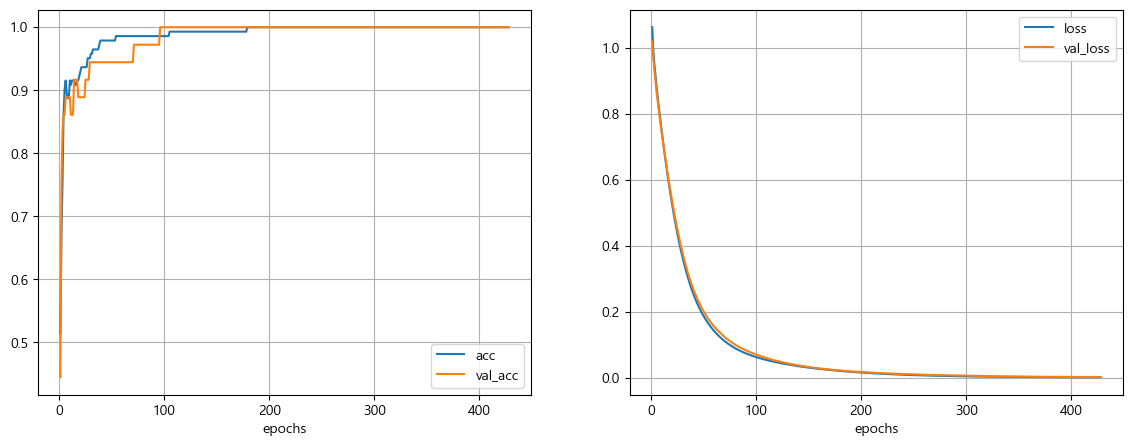

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - acc: 1.0000 - loss: 0.0020 
손실률: 0.00%, 정확도: 1.00%


In [10]:
model = my_tf(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    dense=[
        {"units": 64, "activation": "relu", "input_shape": (x_train.shape[1],)},
        {"units": len(y_train[0]), "activation": "softmax"},
    ],
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

ev = model.evaluate(x_test, y_test)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

### [2] 하이퍼파라미터 튜닝


Trial 9 Complete [00h 00m 01s]
val_acc: 0.8333333134651184

Best val_acc So Far: 0.8888888955116272
Total elapsed time: 00h 00m 13s
+-------+-------+------------+
|       |   acc |       loss |
|-------+-------+------------|
| train |     1 |   0.003817 |
| test  |     1 | 0.00269535 |
+-------+-------+------------+


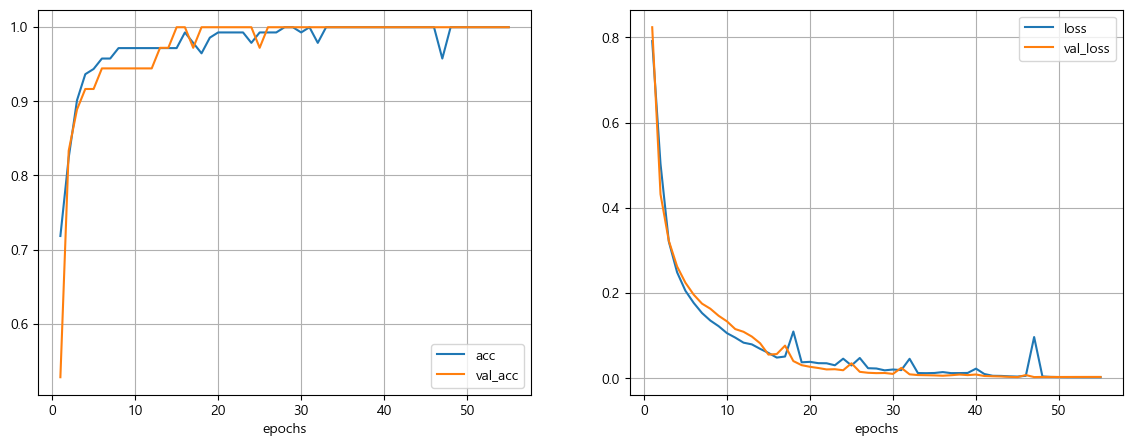

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0027 
손실률: 0.00%, 정확도: 1.00%


In [11]:
model = my_tf(
    x_train=x_train,
    y_train=y_train,
    x_test=x_test,
    y_test=y_test,
    dense_tune=[
        {"units": [128, 64, 32], "activation": "relu", "input_shape": (x_train.shape[1],)},
        {"units": len(y_train[0]), "activation": "softmax"},
    ],
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["acc"],
)

ev = model.evaluate(x_test, y_test)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))

### [2] 이진 분류 전용 함수


Trial 11 Complete [00h 00m 01s]
val_acc: 0.6666666865348816

Best val_acc So Far: 0.9444444179534912
Total elapsed time: 00h 00m 14s
+-------+-------+------------+
|       |   acc |       loss |
|-------+-------+------------|
| train |     1 | 0.00171555 |
| test  |     1 | 0.00161967 |
+-------+-------+------------+


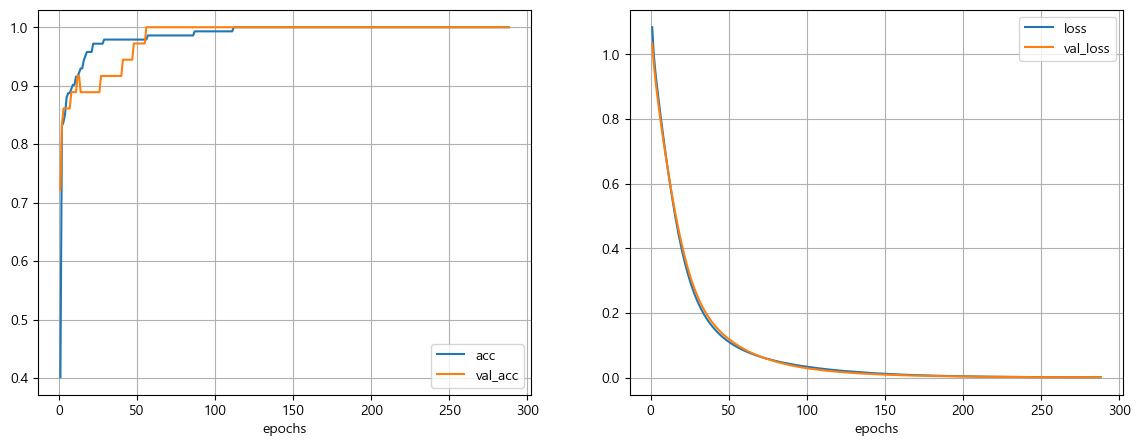

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 1.0000 - loss: 0.0016 
손실률: 0.00%, 정확도: 1.00%


In [12]:
model = my_tf_softmax(x_train, y_train, x_test, y_test)

ev = model.evaluate(x_test, y_test)
print("손실률: %0.2f%%, 정확도: %0.2f%%" % (ev[0], ev[1]))